In [3]:
%cd /content/drive/MyDrive/SOD_Project


/content/drive/MyDrive/SOD_Project


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model loaded.
Upload an image to run the model...


Saving 0010.jpg to 0010 (3).jpg


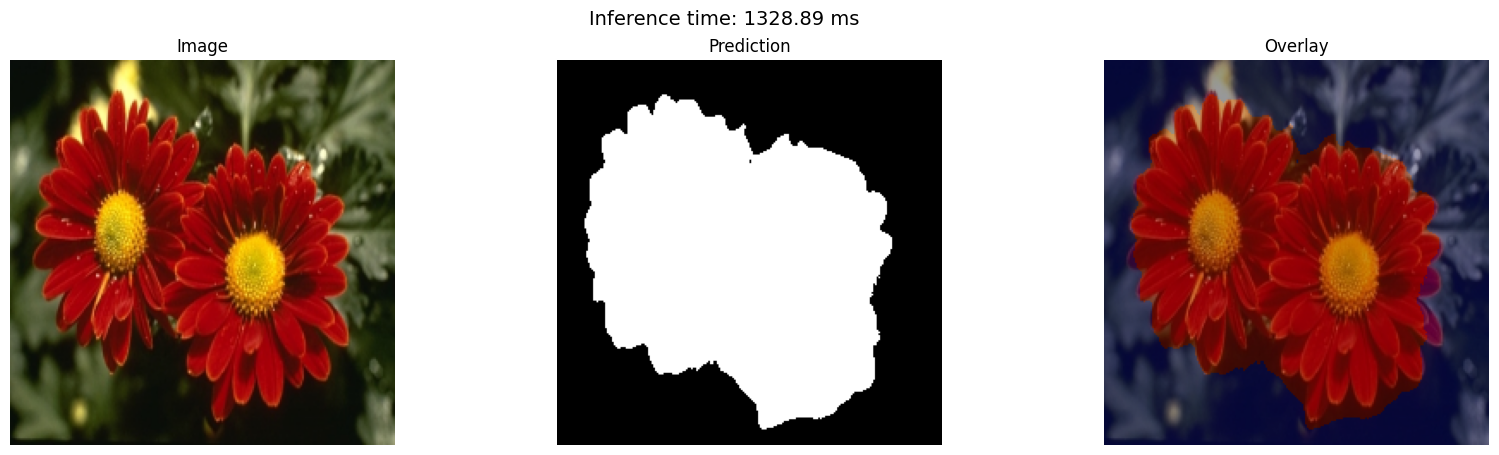


DEMO COMPLETED


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from google.colab import files
from data_loader import load_image


print("Model loaded.")
model = tf.keras.models.load_model("sod_model.h5", compile=False)

def predict_image(img_path, threshold=0.5):
    img = load_image(img_path)

    start = time.time()
    pred = model.predict(np.expand_dims(img, 0), verbose=0)[0]
    infer_time = (time.time() - start) * 1000

    pred_bin = (pred > threshold).astype("float32")

    return img, pred_bin, infer_time

print("Upload an image to run the model...")
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img, pred_bin, infer_time = predict_image(img_path)

    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(pred_bin.squeeze(), cmap="gray")
    plt.title("Prediction")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(img)
    plt.imshow(pred_bin.squeeze(), cmap="jet", alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(f"Inference time: {infer_time:.2f} ms", fontsize=14)
    plt.show()
